In [2]:
# adding autoload so that we dont need to restart kernel to reload libraries every time
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [834]:
from neural_network import *
import numpy as np
from matplotlib import pyplot as plt

In [991]:
# creating the dataset
x = np.arange(0,2*np.pi,0.1)
x = np.random.permutation(x)
y = np.sin(2*x)
#y = (np.sin(2*x)>0)*2-1 #square
x_test = np.arange(0.05,2*np.pi,0.1)
y_test = np.sin(2*x_test)
#y_test = (np.sin(2*x_test)>0)*2-1

In [940]:
#creating the transformation
number_of_rbf_nodes = 63
#means = np.linspace(0, 2*np.pi,number_of_rbf_nodes+2)[1:-1]
means = np.linspace(0, 2*np.pi,number_of_rbf_nodes)
#means = np.sort(np.random.rand(number_of_rbf_nodes)*np.max(x))
#means = x
sigmas = np.ones(number_of_rbf_nodes)*(1.0/(number_of_rbf_nodes*1.2))
#sigmas = np.ones(number_of_rbf_nodes)*(1.0/32)
rbf = RbfTransformation(means,sigmas)
#rbf = StepTransformation(means)
new_x = np.zeros((len(x), number_of_rbf_nodes))
new_x_test = np.zeros((len(x_test), number_of_rbf_nodes))
for i,x_s in enumerate(x):
    new_x[i] = rbf(x_s)
for i,x_s in enumerate(x_test):
    new_x_test[i] = rbf(x_s)

In [941]:
# creating the network
nn = NN(number_of_rbf_nodes) # the number of inputs
#nn.add_transformation(rbf) # adding the transformation we created
nn.add_layer(1, function=Linear(), bias_weight=0) #adding a linear layer at the end

In [942]:
# training the network
nn.train_batch(new_x,y,63,10000,0.8,0)

([], [])

In [921]:
#prediction
ans = []
ab = 0
for x_s, y_true in zip(x,y):
    v = nn.feed_forward(x_s)[1][0]
    ans.append(v)
#    print("v",v,y_true)
    ab+=np.abs((v-y_true))
ab = ab/len(x)
print(ab)
ans = np.array(ans)
ab = 0
for x_s, y_true in zip(x_test,y_test):
    v = nn.feed_forward(x_s)[1][0]
    ab+=np.abs((v-y_true))
ab = ab/len(x_test)
print(ab)
ans = np.array(ans)

ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

In [1042]:
#prediction
ans = []
ab = 0
for x_s, y_true in zip(new_x,y):
    v = nn.feed_forward(x_s)[1][0]
    ans.append(v)
#    print("v",v,y_true)
    ab+=np.abs((v-y_true))
ab = ab/len(x)
print(ab)
ans = np.array(ans)
ab = 0
for x_s, y_true in zip(new_x_test,y_test):
    v = nn.feed_forward(x_s)[1][0]
    ab+=np.abs((v-y_true))
ab = ab/len(x_test)
print(ab)
ans = np.array(ans)

0.00043981374137214537
0.0008810168450986952


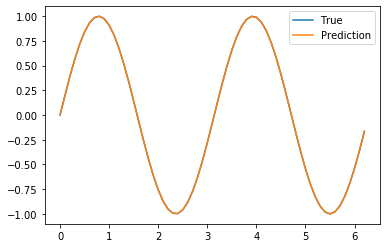

In [1043]:
#ploting
indexes = np.argsort(x)
plt.plot(x[indexes],y[indexes], label="True")
plt.plot(x[indexes],ans[indexes], label="Prediction")
plt.legend()

In [1044]:
training_test_res = []
for nd in range(63,64):
    number_of_rbf_nodes = nd
    means = np.linspace(0, 2*np.pi,number_of_rbf_nodes)
    means = np.random.rand(nd)*2*np.pi
    sigmas = np.ones(number_of_rbf_nodes)*(1.0/(number_of_rbf_nodes*1.2))
    rbf = RbfTransformation(means,sigmas)
    rbf.train_mu(x,0.2,500,winners=1)
    new_x = np.zeros((len(x), number_of_rbf_nodes))
    new_x_test = np.zeros((len(x_test), number_of_rbf_nodes))
    for i,x_s in enumerate(x):
        new_x[i] = rbf(x_s)
    for i,x_s in enumerate(x_test):
        new_x_test[i] = rbf(x_s)
    nn = NN(number_of_rbf_nodes) # the number of inputs
    nn.add_layer(1, function=Linear(), bias_weight=0) #adding a linear layer at the end
    nn.train_batch(new_x,y,1,10000,0.01,0)
    ans = []
    ab = 0
    for x_s, y_true in zip(new_x,y):
        v = nn.feed_forward(x_s)[1][0]
        ab+=np.abs((v-y_true))
    ab = ab/len(x)
    ans.append(ab)
    ab = 0
    for x_s, y_true in zip(new_x_test,y_test):
        v = nn.feed_forward(x_s)[1][0]
        ab+=np.abs((v-y_true))
    ab = ab/len(x_test)
    ans.append(ab)
    training_test_res.append([nd,ans[0],ans[1]])
    print(nd,ans)
    

63 [0.006804554930936141, 0.00687749709399338]


In [1017]:
new_x # 0.00058, ci 0.0008

array([[5.79787665e-051, 5.48469739e-164, 5.45812639e-060, ...,
        9.03644493e-009, 1.43749655e-087, 6.68952313e-040],
       [5.94688025e-116, 4.24737171e-084, 1.97679530e-129, ...,
        9.42305173e-043, 6.66792068e-033, 7.60501751e-099],
       [3.27017578e-099, 1.49039971e-099, 1.06071724e-111, ...,
        6.66792068e-033, 9.42305173e-043, 1.89722494e-083],
       ...,
       [6.93447738e-185, 2.38612270e-040, 7.94218785e-202, ...,
        1.43749655e-087, 9.03644493e-009, 4.45909064e-163],
       [1.55185994e-207, 8.36817926e-031, 1.82147375e-225, ...,
        2.49993462e-103, 7.86895653e-005, 2.19962366e-184],
       [8.92504786e-257, 1.18191934e-015, 1.10019305e-276, ...,
        8.68265994e-139, 6.85230501e-001, 6.14657251e-231]])

In [1015]:
rbf.sigmas = np.ones(number_of_rbf_nodes)*(1.0/(number_of_rbf_nodes*1.2))

In [1027]:
rbf.means

array([4.10000000e+00, 1.49603489e-01, 9.00000000e-01, 5.35288659e+00,
       5.00000000e+00, 3.24666526e+00, 1.86863190e+00, 2.55920317e+00,
       4.65902590e+00, 5.26735439e+00, 6.14934307e+00, 2.10000000e+00,
       5.00000000e-01, 4.00000000e+00, 3.03632468e+00, 1.64516583e-53,
       3.43884429e+00, 5.50000000e+00, 6.60598042e-01, 4.00000000e-01,
       2.20000000e+00, 4.50000000e+00, 4.80000000e+00, 1.40000000e+00,
       2.15866609e+00, 4.90000000e+00, 2.85038228e+00, 5.74784904e+00,
       5.05858176e+00, 1.24135421e+00, 1.60000000e+00, 4.60000000e+00,
       3.00000000e-01, 5.92403709e+00, 2.70000000e+00, 5.60000000e+00,
       2.02476292e+00, 2.06293565e+00, 8.76035042e-01, 5.18198601e+00,
       4.20000000e+00, 3.61692757e+00, 2.60000000e+00, 2.40000000e+00,
       2.50000000e+00, 2.37426439e+00, 2.00000000e+00, 5.30000000e+00,
       4.33332466e+00, 5.10000000e+00, 5.40000000e+00, 2.63548403e+00,
       1.03122984e+00, 2.12447720e+00, 4.70000000e+00, 1.50000000e+00,
      

In [966]:
training_test_res = np.array(training_test_res)
np.save('results_cl',training_test_res)

In [1012]:
nn.layers[0].W

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]])

In [980]:
results = np.load('Lab_2_data/results_3_1.npy')

In [982]:
results

array([[4.00000000e+00, 4.27233335e-01, 4.27731142e-01],
       [5.00000000e+00, 5.90356756e-01, 5.90809214e-01],
       [6.00000000e+00, 2.99323336e-01, 2.99976458e-01],
       [7.00000000e+00, 2.35152199e-01, 2.34393678e-01],
       [8.00000000e+00, 1.77795331e-01, 1.77713355e-01],
       [9.00000000e+00, 1.29032276e-01, 1.29525081e-01],
       [1.00000000e+01, 9.09721588e-02, 9.01353373e-02],
       [1.10000000e+01, 6.29385568e-02, 6.27043989e-02],
       [1.20000000e+01, 4.31499657e-02, 4.28320797e-02],
       [1.30000000e+01, 2.97326382e-02, 2.91334500e-02],
       [1.40000000e+01, 2.02410114e-02, 1.99934488e-02],
       [1.50000000e+01, 1.38316022e-02, 1.37157266e-02],
       [1.60000000e+01, 9.63688504e-03, 9.57664850e-03],
       [1.70000000e+01, 6.90010520e-03, 6.94807151e-03],
       [1.80000000e+01, 5.26784403e-03, 5.31429928e-03],
       [1.90000000e+01, 4.26599441e-03, 4.17607423e-03],
       [2.00000000e+01, 3.57169188e-03, 3.51498845e-03],
       [2.10000000e+01, 3.10002

In [738]:
# for the sin
nodes = np.array([64,60,56,50,49,48,45,40,35,30,25,20,17,16,15,10,9])
tr_error = np.array([0.00044,0.00047,0.00049,0.000557,0.00057,0.00063,0.00064,0.00072,0.00103,0.0014,0.0021,0.00357,0.00698,0.00964,0.0138,0.09097,0.12903])
te_error = np.array([0.0009,0.00092,0.00092,0.00096,0.00097,0.00102,0.00101,0.00103,0.0013,0.00175,0.00223,0.00352,0.00687,0.00956,0.0137,0.09014,0.12953])

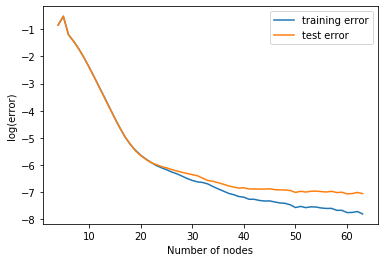

In [985]:
plt.plot(results[:,0],np.log(results[:,1]), label='training error')
plt.plot(results[:,0],np.log(results[:,2]), label='test error')
plt.legend()
plt.xlabel('Number of nodes')
plt.ylabel('log(error)')
#plt.savefig('Lab_2_data/3_1_sin_error.png')

In [828]:
rbf(x[8])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [827]:
x[8]

1.3

In [833]:
np.argmin(np.abs(x[8]-rbf.means))

12

In [1000]:
rbf.means = np.random.rand(63)*2*np.pi

In [1004]:
rbf.train_mu(x,0.02,1000)

In [1019]:
np.sort(rbf.means)

array([2.48649984e-19, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
       3.09171115e-01, 4.44442714e-01, 6.00000000e-01, 7.00000000e-01,
       7.16339631e-01, 8.00000000e-01, 9.00000000e-01, 1.00000000e+00,
       1.15066643e+00, 1.35522847e+00, 1.55197627e+00, 1.70000000e+00,
       1.85549511e+00, 2.05051206e+00, 2.20000000e+00, 2.23240503e+00,
       2.26975480e+00, 2.30000000e+00, 2.40000000e+00, 2.54605980e+00,
       2.70000000e+00, 2.73466720e+00, 2.75900673e+00, 2.80000000e+00,
       2.90000000e+00, 2.99317213e+00, 3.00000000e+00, 3.10000000e+00,
       3.20000000e+00, 3.34402899e+00, 3.50000000e+00, 3.65009019e+00,
       3.80000000e+00, 3.90000000e+00, 3.91317037e+00, 4.00000000e+00,
       4.10000000e+00, 4.13860488e+00, 4.14899602e+00, 4.20000000e+00,
       4.30000000e+00, 4.40000000e+00, 4.55745026e+00, 4.70000000e+00,
       4.80000000e+00, 4.90000000e+00, 5.00000000e+00, 5.03461468e+00,
       5.10000000e+00, 5.18077333e+00, 5.18508669e+00, 5.20000000e+00,
      

(array([7., 6., 4., 6., 9., 4., 9., 6., 8., 4.]),
 array([9.09784556e-11, 6.28313182e-01, 1.25662636e+00, 1.88493955e+00,
        2.51325273e+00, 3.14156591e+00, 3.76987909e+00, 4.39819228e+00,
        5.02650546e+00, 5.65481864e+00, 6.28313182e+00]),
 <a list of 10 Patch objects>)

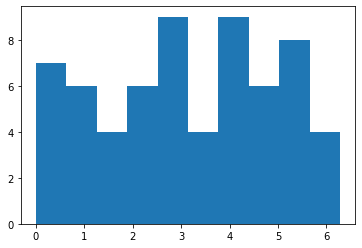

In [1003]:
plt.hist(np.sort(rbf.means))

(array([ 5.,  5.,  6., 11.,  8.,  3.,  4.,  7., 10.,  4.]),
 array([1.64516583e-53, 6.14934307e-01, 1.22986861e+00, 1.84480292e+00,
        2.45973723e+00, 3.07467153e+00, 3.68960584e+00, 4.30454015e+00,
        4.91947446e+00, 5.53440876e+00, 6.14934307e+00]),
 <a list of 10 Patch objects>)

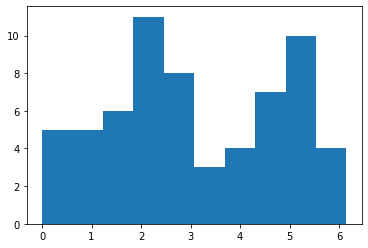

In [1028]:
plt.hist(np.sort(rbf.means))

In [1036]:
np.max(new_x)

1.0

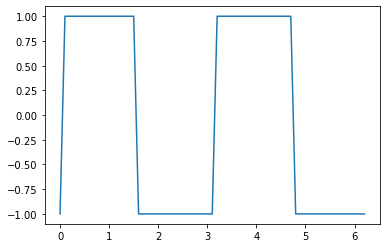

In [1047]:
x = np.sort(x)
plt.plot(x,(np.sin(2*x)>0)*2-1)